**Modeling and Forecasting Inflation in the United States from 1972-2022**

***Inserting and Loading Packages***

In [1]:
# Loading Packages
library(readr)
library(dplyr)
library(tidyr)
library(stringr)
library(lubridate)
library(purrr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
#displays the version of R currently running
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          2.3                         
year           2023                        
month          03                          
day            15                          
svn rev        83980                       
language       R                           
version.string R version 4.2.3 (2023-03-15)
nickname       Shortstop Beagle            

In [3]:
#provides all the packages currently available in this R environment and other packages required and not there in this environment are installed and loaded
library()

In [4]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
install.packages("repr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
install.packages("gganimate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
install.packages("vars")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:purrr’:

    some


The following object is masked from ‘package:dplyr’:

    recode




In [11]:
#loading the installed packages
library(corrplot)
library(repr)
library(psych)
library(gganimate)
library(vars)
library(forecast)

corrplot 0.92 loaded


Attaching package: ‘psych’


The following object is masked from ‘package:car’:

    logit


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


No renderer backend detected. gganimate will default to writing frames to separate files
Consider installing:
- the `gifski` package for gif output
- the `av` package for video output
and restarting the R session

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich


Attaching package: ‘strucchange’


The following object is masked from ‘package:stringr’:

    boundary


Loading required package: urca

Loading required package: lmtest

Registered S3 method overwritten by 'quantmod':
  method            from
 

In [12]:
# Controls Figure Size and which can be used for displaying graphs or plots 
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

***Loading Data***

In [13]:
# Loading Data
Monthly_Inflation <- read_csv("CPI for urban consumers.csv")
FEDFUNDS <- read_csv("FEDFUNDS.csv")
Monthly_Unemployment <- read_csv("Unemployment Rate.csv")
UMCSENT <- read_csv("UMCSENT.csv")
AllCommodities_Index <- read_csv("PPI Commodity Data.csv")
M2SL <- read_csv("M2SL.csv")
WTI_Oil_Prices <- read_csv("PPI Commodity Data for Fuels(2).csv")
GoldPrices <- read_csv("GoldPrices.csv")
Mortgage_Rate <- read_csv("mortgage_rate.csv")
#GDP <- read_csv("GDP.csv")

Rows: 877 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Series ID, Period, Label
dbl (3): Year, Value, 12-Month % Change

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 818 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (1): FEDFUNDS
date (1): DATE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 902 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Series ID, Period, Label
dbl (2): Year, Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 843 Columns: 2


***Data Cleaning and Numeric-EDA***

In [14]:
#Cleaning GoldPrice Dataset

##Renaming both the columns in the dataset
colnames(GoldPrices)[c(1,2)]<- c("DATE","GoldPrice")

In [15]:
#looking at the data after it is done
GoldPrices

DATE,GoldPrice
<chr>,<dbl>
12/31/1969,35.20
1/30/1970,34.99
2/27/1970,35.02
3/31/1970,35.30
4/30/1970,35.85
5/29/1970,35.45
6/30/1970,35.49
7/31/1970,35.30
8/31/1970,35.80


In [16]:
##getting the month and Year from date which is in character datatype
GoldPrices$Month <- substr(GoldPrices$DATE, 1, ifelse(substr(GoldPrices$DATE, 2, 2) == "/", 1, 2))
#GoldPrices$Year <- substr(GoldPrices$DATE, 7, 10)
GoldPrices$Year <- substr(GoldPrices$DATE, nchar(GoldPrices$DATE) - 3, nchar(GoldPrices$DATE))

In [17]:
GoldPrices

DATE,GoldPrice,Month,Year
<chr>,<dbl>,<chr>,<chr>
12/31/1969,35.20,12,1969
1/30/1970,34.99,1,1970
2/27/1970,35.02,2,1970
3/31/1970,35.30,3,1970
4/30/1970,35.85,4,1970
5/29/1970,35.45,5,1970
6/30/1970,35.49,6,1970
7/31/1970,35.30,7,1970
8/31/1970,35.80,8,1970


In [18]:
#filtering the data and getting year, month and GoldPrice columns from 1971
GoldPrices <- subset(GoldPrices[GoldPrices$Year>=1971,], select = c("Year", "Month", "GoldPrice"))
#GoldPrices$Month <- month.abb[GoldPrices$Month]
GoldPrices

Year,Month,GoldPrice
<chr>,<chr>,<dbl>
1971,1,38.05
1971,2,38.80
1971,3,38.88
1971,4,39.70
1971,5,40.84
1971,6,40.10
1971,7,42.40
1971,8,40.65
1971,9,42.60


In [19]:
#converting month and year to numeric datatype as they are in char and couldn't convert month to abbrevation of it since it is char format
GoldPrices$Month <- as.double(GoldPrices$Month)

In [20]:
#converting year to numeric data type
GoldPrices$Year <- as.double(GoldPrices$Year)

In [21]:
#converting month into abbrevation using month.abb(eg:Jan,Feb)
GoldPrices$Month <- month.abb[GoldPrices$Month]

In [22]:
#GoldPrice column is used for time series analysis and modeling so it is converted into timeseries using ts
GoldPrices$GoldPrice <- ts(GoldPrices$GoldPrice, start=1971, frequency=12)

In [23]:
#viewing goldprice dataset after cleaning
GoldPrices

Year,Month,GoldPrice
<dbl>,<chr>,<ts>
1971,Jan,38.05
1971,Feb,38.80
1971,Mar,38.88
1971,Apr,39.70
1971,May,40.84
1971,Jun,40.10
1971,Jul,42.40
1971,Aug,40.65
1971,Sep,42.60


In [24]:
#summary of the GoldPrice dataset 
##no missing values in GoldPrice dataset
summary(GoldPrices)

      Year         Month             GoldPrice      
 Min.   :1971   Length:626         Min.   :  38.05  
 1st Qu.:1984   Class :character   1st Qu.: 305.30  
 Median :1997   Mode  :character   Median : 391.35  
 Mean   :1997                      Mean   : 639.98  
 3rd Qu.:2010                      3rd Qu.:1085.25  
 Max.   :2023                      Max.   :1964.90  

In [25]:
#cleaning mortgage rate dataset
colnames(Mortgage_Rate)[c(1,2)]<- c("DATE","MortgageRate")
Mortgage_Rate$Month <- substr(Mortgage_Rate$DATE, 1, ifelse(substr(Mortgage_Rate$DATE, 2, 2) == "/", 1, 2))
Mortgage_Rate$Year <- substr(Mortgage_Rate$DATE, nchar(Mortgage_Rate$DATE) - 3, nchar(Mortgage_Rate$DATE))
Mortgage_Rate <- subset(Mortgage_Rate[Mortgage_Rate$Year>=1971,], select = c("Year", "Month", "MortgageRate"))
Mortgage_Rate$Month <- as.double(Mortgage_Rate$Month)
Mortgage_Rate$Year <- as.double(Mortgage_Rate$Year)
Mortgage_Rate$Month <- month.abb[Mortgage_Rate$Month]
#this is used for time series analysis and modeling
Mortgage_Rate$MortgageRate <- ts(Mortgage_Rate$MortgageRate, start=1971, frequency=12)
Mortgage_Rate



Year,Month,MortgageRate
<dbl>,<chr>,<ts>
1971,Apr,7.29
1971,May,7.46
1971,Jun,7.54
1971,Jul,7.69
1971,Aug,7.69
1971,Sep,7.67
1971,Oct,7.63
1971,Nov,7.51
1971,Dec,7.48


In [26]:
#summary of mortgage rate dataset
##no missing values for mortgage rate dataset
summary(Mortgage_Rate)

      Year         Month            MortgageRate   
 Min.   :1971   Length:624         Min.   : 2.670  
 1st Qu.:1984   Class :character   1st Qu.: 5.100  
 Median :1997   Mode  :character   Median : 7.425  
 Mean   :1997                      Mean   : 7.752  
 3rd Qu.:2010                      3rd Qu.: 9.505  
 Max.   :2023                      Max.   :18.440  

In [27]:
#looking at GDP dataset 
#GDP

In [28]:
# cleaning GDP dataset
#GDP$DATE <- as.Date(GDP$DATE, format = "%Y/%m/%d")
#GDP$Month <- substr(GDP$DATE, 6, 7)
#GoldPrices$Year <- substr(GoldPrices$DATE, 7, 10)
#GDP$Year <- substr(GDP$DATE, 1, 4)
#GDP <- subset(GDP[GDP$Year>=1971,], select = c("Year", "Month", "GDP"))
#GDP

In [29]:
#GDP$Month <- as.double(GDP$Month)
#GDP$Year <- as.double(GDP$Year)
#GDP$Month <- month.abb[GDP$Month]
#this is used for time series analysis and modeling
#GDP$GDP <- ts(GDP$GDP, start=1971, frequency=12)
#GDP

In [30]:
#summary(GDP)

In [31]:
# Cleaning MonthlyInflation data

##getting month from Label column
Monthly_Inflation$Month <- substring(Monthly_Inflation$Label, 6, 8)
#Monthly_Inflation$month
colnames(Monthly_Inflation)[c(5,6)]<- c("MonthlyInflation","Rate")
#Monthly_Inflation$MonthlyInflation
#Monthly_Inflation$Rate
Inflation_long <- subset(Monthly_Inflation[Monthly_Inflation$Year>=1971,], select = c("Year", "Month", "MonthlyInflation", "Rate"))
#Inflation_long
Inflation_long <- Inflation_long %>% 
  filter(Year >= 1970)
#Rate is used for time series analysis and modeling
Inflation_long$Rate <- ts(Inflation_long$Rate, start=1971, frequency=12)
Inflation_long

Year,Month,MonthlyInflation,Rate
<dbl>,<chr>,<dbl>,<ts>
1971,Jan,39.8,5.3
1971,Feb,39.9,5.0
1971,Mar,40.0,4.7
1971,Apr,40.1,4.2
1971,May,40.3,4.4
1971,Jun,40.6,4.6
1971,Jul,40.7,4.4
1971,Aug,40.8,4.6
1971,Sep,40.8,4.1


In [32]:
#summary of rate in Inflation dataset
##no missing values in Rate column
summary(Inflation_long$Rate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -2.100   2.100   3.200   4.009   4.900  14.800 

In [33]:
#summary of whole inflation long dataset
summary(Inflation_long)

      Year         Month           MonthlyInflation      Rate       
 Min.   :1971   Length:625         Min.   : 39.8    Min.   :-2.100  
 1st Qu.:1984   Class :character   1st Qu.:101.9    1st Qu.: 2.100  
 Median :1997   Mode  :character   Median :159.1    Median : 3.200  
 Mean   :1997                      Mean   :157.2    Mean   : 4.009  
 3rd Qu.:2010                      3rd Qu.:218.0    3rd Qu.: 4.900  
 Max.   :2023                      Max.   :299.2    Max.   :14.800  

In [34]:
#merging year and month into a single data in this inflation dataset
Inflation_long <- Inflation_long %>%
  mutate(Date = paste(Year, Month, "01", sep="-") %>% ymd()) %>%
  arrange(Date)

In [35]:
#looking at the dataset after doing this
Inflation_long

Year,Month,MonthlyInflation,Rate,Date
<dbl>,<chr>,<dbl>,<dbl>,<date>
1971,Jan,39.8,5.3,1971-01-01
1971,Feb,39.9,5.0,1971-02-01
1971,Mar,40.0,4.7,1971-03-01
1971,Apr,40.1,4.2,1971-04-01
1971,May,40.3,4.4,1971-05-01
1971,Jun,40.6,4.6,1971-06-01
1971,Jul,40.7,4.4,1971-07-01
1971,Aug,40.8,4.6,1971-08-01
1971,Sep,40.8,4.1,1971-09-01


In [36]:
#looking at FEDFUNDS dataset
FEDFUNDS

DATE,FEDFUNDS
<date>,<dbl>
1955-01-01,1.39
1955-02-01,1.29
1955-03-01,1.35
1955-04-01,1.43
1955-05-01,1.43
1955-06-01,1.64
1955-07-01,1.68
1955-08-01,1.96
1955-09-01,2.18


In [37]:
# cleaning Federal Funds dataset
FEDFUNDS$DATE <- ymd(FEDFUNDS$DATE)
FEDFUNDS$Year <- year(FEDFUNDS$DATE)
FEDFUNDS$Month <- month(FEDFUNDS$DATE)
FEDFUNDS <- FEDFUNDS %>% 
  filter(Year >= 1971)
#used for time series analysis and modeling
FEDFUNDS$FEDFUNDS <- ts(FEDFUNDS$FEDFUNDS, start=1971, frequency=12)
FEDFUNDS<- subset(FEDFUNDS, select= c("Year", "Month", "FEDFUNDS"))
FEDFUNDS

Year,Month,FEDFUNDS
<dbl>,<dbl>,<dbl>
1971,1,4.14
1971,2,3.72
1971,3,3.71
1971,4,4.16
1971,5,4.63
1971,6,4.91
1971,7,5.31
1971,8,5.57
1971,9,5.55


In [38]:
FEDFUNDS

Year,Month,FEDFUNDS
<dbl>,<dbl>,<dbl>
1971,1,4.14
1971,2,3.72
1971,3,3.71
1971,4,4.16
1971,5,4.63
1971,6,4.91
1971,7,5.31
1971,8,5.57
1971,9,5.55


In [39]:
#summary of FEDFUNDS in the dataset
##no missing values
summary(FEDFUNDS$FEDFUNDS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.050   1.260   4.870   4.860   6.885  19.100 

In [40]:
summary(FEDFUNDS)

      Year          Month           FEDFUNDS     
 Min.   :1971   Min.   : 1.000   Min.   : 0.050  
 1st Qu.:1984   1st Qu.: 3.000   1st Qu.: 1.260  
 Median :1997   Median : 6.000   Median : 4.870  
 Mean   :1997   Mean   : 6.484   Mean   : 4.860  
 3rd Qu.:2010   3rd Qu.: 9.000   3rd Qu.: 6.885  
 Max.   :2023   Max.   :12.000   Max.   :19.100  

In [41]:
#looking at money supply dataset
M2SL

DATE,M2SL
<date>,<dbl>
1959-01-01,286.6
1959-02-01,287.7
1959-03-01,289.2
1959-04-01,290.1
1959-05-01,292.2
1959-06-01,294.1
1959-07-01,295.2
1959-08-01,296.4
1959-09-01,296.7


In [42]:
# Cleaning Money Supply dataset
M2SL$DATE <- ymd(M2SL$DATE)
M2SL$Year <- year(M2SL$DATE)
M2SL$Month <- month(M2SL$DATE)
#M2SL
M2SL <- M2SL %>% 
  filter(Year >= 1971)
M2SL$M1_change<- diff(M2SL$M2SL, lag = 12) / lag(M2SL$M2SL, 12)
#M2SL$M1_change
M2SL$M1_change<- ts(M2SL$M1_change*100, start=1971, frequency = 12)
#M2SL$M1_change <- na.approx(M2SL$M1_change)
M2SL <- subset(M2SL, select=-c(DATE, M2SL))
M2SL

Warning message in diff(M2SL$M2SL, lag = 12)/lag(M2SL$M2SL, 12):
“longer object length is not a multiple of shorter object length”


Year,Month,M1_change
<dbl>,<dbl>,<dbl>
1971,1,NA
1971,2,NA
1971,3,NA
1971,4,NA
1971,5,NA
1971,6,NA
1971,7,NA
1971,8,NA
1971,9,NA


In [43]:
#looking at values of M1 change in M2SL
M2SL$M1_change

[1]         NA         NA         NA         NA         NA         NA
  [7]         NA         NA         NA         NA         NA         NA
 [13] 14.6310634 13.7909516 12.5865518 12.3481166 12.5243738 12.4219911
 [19] 11.3301942 10.2261123  8.8086643  7.9753723  7.8058473  7.4897930
 [25]  6.8830988  6.9036792  7.4710293  7.2047671  6.4307816  5.9357076
 [31]  5.9117841  5.8930662  6.2443788  6.4430042  6.2602343  5.8083011
 [37]  5.7509564  6.1294681  6.7337176  7.5881420  8.8655056 10.2244090
 [43] 11.2014345 11.8025751 12.3436197 12.4020888 12.7576864 13.3372297
 [49] 13.9932535 14.6031011 14.3661648 14.4002749 14.2007775 13.0553657
 [55] 12.6162923 13.0754440 13.4361978 14.2393373 14.6116181 15.0537634
 [61] 15.2929494 15.0202385 14.9729730 14.8433323 14.4424517 14.5586708
 [67] 14.3985232 14.0677449 13.6560767 12.9284426 12.3348893 11.6414092
 [73] 11.1533216 10.3720081  9.8761905  9.5022624  9.4674004  9.3448404
 [79]  8.9662156  8.7831073  8.8944905  8.7377778  8.4958707  8.3072917
 [85]  7.8870580  7.8379755  8.0437526  8.4778259  8.2464847  8.5810478
 [91]  9.0242113  9.1430881  8.7546140  8.6204147  8.4600760  8.4783122
 [97]  8.6817223  9.0859588  8.6673889  7.6976315  7.7909195  8.0546075
[103]  8.3603957  8.6164229  8.9144981  9.1991422  9.5577956  9.2313324
[109]  9.0551181  9.0071128  9.8573281 11.1974895 10.7715218  9.9156711
[115]  9.5065514  9.1801466  9.0777801  9.3809915  9.5709121 10.5652439
[121] 11.0271801 10.4241938  9.9946660  9.6325389  9.9980163 10.1817944
[127]  9.6797153  9.6637848  9.6823380  9.3324079  9.2492794  9.4011751
[133] 11.7617773 13.7332427 13.9740926 13.5426712 13.6822497 13.6203077
[139] 13.8712171 13.5041020 13.1770223 13.3290742 13.1674443 12.3953290
[145] 10.0994126  9.0955199  8.9560593  9.0415211  8.8685689  8.8499452
[151]  8.6650287  8.4760460  8.6741283  8.5414772  8.9770133  9.5965161
[157]  9.9111973  9.8106971  9.4779674  9.0555063  9.0744457  9.6177258
[163]  9.9767532 10.2989392 10.1766513  9.9609375  9.2979217  8.7449965
[169]  7.9365822  7.3579835  7.6728577  8.3223069  8.8607595  8.6858381
[175]  8.8644030  9.0790890  9.4189984  9.7126920  9.7966161 10.2280610
[181] 10.3670039  9.9655919  9.3229651  8.8364065  7.8719397  7.0297604
[187]  6.2728957  5.7978723  5.3615046  5.1620746  4.7461458  3.9484772
[193]  4.1365253  4.8907637  5.4083929  5.5907420  5.9230888  6.2879079
[199]  6.4037158  6.1893066  5.8999925  5.6002084  5.9711991  5.9310850
[205]  5.2589380  4.4331210  3.9583106  3.4432923  3.0870208  3.2256902
[211]  3.7855344  4.3899290  4.8437221  5.2863436  5.4311966  5.8130484
[217]  6.1494697  6.5147715  6.5866399  6.7200330  6.4593301  6.3231691
[223]  5.8394408  5.6775068  5.4820927  4.8966378  4.3386350  3.9923700
[229]  4.0411806  4.1875543  4.3937727  4.3512974  4.7283836  4.5642194
[235]  4.3113616  3.6755139  3.2433306  3.2368903  3.2840775  3.1847740
[241]  2.9525073  3.0039004  2.5704523  2.1020740  1.7371743  1.2913464
[247]  1.1722748  1.3510179  1.7022061  1.9544074  1.8696745  1.6046213
[253]  1.1527816  0.4387956  0.2348054  0.3480975  1.1456775  1.4618575
[259]  1.4332112  1.3979136  1.2489195  0.9791375  1.2954984  1.4767807
[265]  1.6503017  1.8000000  2.0094597  2.0590052  1.5859472  1.0932988
[271]  1.3612658  1.1768860  0.9940474  0.8061219  0.4990515  0.3474757
[277]  0.5118306  0.4158735  0.3224199  0.5247266  0.9718060  2.0160353
[283]  2.3009878  2.9979395  3.3601761  3.7347759  3.8240973  4.1185782
[289]  4.4749489  4.9457663  5.6262751  5.7018930  5.3111035  4.9892226
[295]  4.8649733  4.4467395  4.3400935  4.5748070  5.0240881  5.4239330
[301]  5.3458939  5.2866844  4.9926957  5.1240283  5.0961920  5.1706162
[307]  5.2363066  5.9459459  6.0992199  6.0746112  6.0692284  5.9043945
[313]  6.0747279  6.6251570  6.8648458  7.1179382  7.4185896  7.4707858
[319]  7.4897648  7.2462607  7.8462194  8.3598388  8.7375827  8.9640182
[325]  9.0335367  8.7460676  8.2306019  8.2667011  8.2510542  8.2718894
[331]  8.4278396  8.1619245  7.5532959  7.

In [44]:
#we can see there are 12 null values in the M1 change column 
summary(M2SL)

      Year          Month          M1_change     
 Min.   :1971   Min.   : 1.000   Min.   :-1.929  
 1st Qu.:1984   1st Qu.: 3.000   1st Qu.: 5.108  
 Median :1997   Median : 6.000   Median : 6.826  
 Mean   :1997   Mean   : 6.491   Mean   : 7.393  
 3rd Qu.:2010   3rd Qu.: 9.000   3rd Qu.: 9.086  
 Max.   :2023   Max.   :12.000   Max.   :28.694  
                                 NA's   :12      

In [45]:
# Remove null values from the dbl_column M1_change
 M2SL<- M2SL[!is.na(M2SL$M1_change),]

In [46]:
#no missing values now
summary(M2SL$M1_change)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -1.929   5.108   6.826   7.393   9.086  28.694 

In [47]:
#looking at monthly unemployment dataset
Monthly_Unemployment

Series ID,Year,Period,Label,Value
<chr>,<dbl>,<chr>,<chr>,<dbl>
LNS14000000,1948,M01,1948 Jan,3.4
LNS14000000,1948,M02,1948 Feb,3.8
LNS14000000,1948,M03,1948 Mar,4.0
LNS14000000,1948,M04,1948 Apr,3.9
LNS14000000,1948,M05,1948 May,3.5
LNS14000000,1948,M06,1948 Jun,3.6
LNS14000000,1948,M07,1948 Jul,3.6
LNS14000000,1948,M08,1948 Aug,3.9
LNS14000000,1948,M09,1948 Sep,3.8


In [48]:
# Cleaning Unemployment dataset
Monthly_Unemployment$Month <- substring(Monthly_Unemployment$Label, 6, 8)
colnames(Monthly_Unemployment)[c(5)]<- c("Unemployment")
Unemployment <- subset(Monthly_Unemployment, select = c("Year", "Month", "Unemployment"))
Unemployment <- Unemployment %>% 
  filter(Year >= 1971)
#Unemployment
#this is used for time series analysis and modeling
Unemployment$Unemployment <- ts(Unemployment$Unemployment, start=1971, frequency=12)
Unemployment

Year,Month,Unemployment
<dbl>,<chr>,<ts>
1971,Jan,5.9
1971,Feb,5.9
1971,Mar,6.0
1971,Apr,5.9
1971,May,5.9
1971,Jun,5.9
1971,Jul,6.0
1971,Aug,6.1
1971,Sep,6.0


In [49]:
#looking if there are any missing values
summary(Unemployment)

      Year         Month            Unemployment   
 Min.   :1971   Length:626         Min.   : 3.400  
 1st Qu.:1984   Class :character   1st Qu.: 5.000  
 Median :1997   Mode  :character   Median : 5.800  
 Mean   :1997                      Mean   : 6.189  
 3rd Qu.:2010                      3rd Qu.: 7.300  
 Max.   :2023                      Max.   :14.700  

In [50]:
#no missing values in unemployment column
summary(Unemployment$Unemployment)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.400   5.000   5.800   6.189   7.300  14.700 

In [51]:
# Cleaning Consumer Sentiment dataset
UMCSENT$DATE <- ymd(UMCSENT$DATE)
UMCSENT$Year <- year(UMCSENT$DATE)
UMCSENT$Month <- month(UMCSENT$DATE)
UMCSENT <- subset(UMCSENT, select=c(Year,Month,UMCSENT))
summary(UMCSENT)
#there are few '.' values in UMCSENT column which are replaced with NaN values 
UMCSENT$UMCSENT <- as.numeric(ifelse(UMCSENT$UMCSENT==".",NaN,UMCSENT$UMCSENT))
UMCSENT <- UMCSENT %>%
    mutate(UMCSENT = na.approx(UMCSENT))
UMCSENT$UMCSENT <- ts(UMCSENT$UMCSENT, start=1971, frequency = 12)

      Year          Month          UMCSENT         
 Min.   :1952   Min.   : 1.000   Length:843        
 1st Qu.:1970   1st Qu.: 3.500   Class :character  
 Median :1987   Median : 7.000   Mode  :character  
 Mean   :1987   Mean   : 6.505                     
 3rd Qu.:2005   3rd Qu.:10.000                     
 Max.   :2023   Max.   :12.000                     

In [52]:
UMCSENT <- UMCSENT %>% 
  filter(Year >= 1971)

In [53]:
UMCSENT

Year,Month,UMCSENT
<dbl>,<dbl>,<dbl>
1971,1,76.20000
1971,2,78.10000
1971,3,78.80000
1971,4,79.50000
1971,5,80.20000
1971,6,80.83333
1971,7,81.46667
1971,8,82.10000
1971,9,82.06667


In [54]:
#summary of UMCSENT column now
#no missing values
summary(UMCSENT$UMCSENT)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   50.0    75.0    87.7    84.6    93.8   112.0 

In [55]:
#to check is there are any missing values using sum
##no missing values now
sum(is.nan(UMCSENT$UMCSENT))

[1] 0

In [56]:
#looking at the Oil Prices dataset
WTI_Oil_Prices

Series ID,Year,Period,Label,Value,12-Month % Change
<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
WPU0561,1947,M01,1947 Jan,7.3,N/A
WPU0561,1947,M02,1947 Feb,7.3,N/A
WPU0561,1947,M03,1947 Mar,8.0,N/A
WPU0561,1947,M04,1947 Apr,8.4,N/A
WPU0561,1947,M05,1947 May,8.4,N/A
WPU0561,1947,M06,1947 Jun,8.4,N/A
WPU0561,1947,M07,1947 Jul,8.5,N/A
WPU0561,1947,M08,1947 Aug,8.5,N/A
WPU0561,1947,M09,1947 Sep,8.6,N/A


In [57]:
# Cleaning WTI Oil Prices
WTI_Oil_Prices$Month <- substring(WTI_Oil_Prices$Label, 6, 8)
colnames(WTI_Oil_Prices)[c(6)]<- c("OilChange")
WTI_Oil_Prices<- subset(WTI_Oil_Prices, select = c("Year", "Month", "OilChange"))
#WTI_Oil_Prices
WTI_Oil_Prices <- WTI_Oil_Prices %>% 
  filter(Year >= 1971)
#this is used for time series analysis and modeling
WTI_Oil_Prices$OilChange <- ts(WTI_Oil_Prices$OilChange, start=1971, frequency=12)
WTI_Oil_Prices

Year,Month,OilChange
<dbl>,<chr>,<ts>
1971,Jan,7.6
1971,Feb,7.6
1971,Mar,7.6
1971,Apr,7.6
1971,May,7.6
1971,Jun,7.6
1971,Jul,9.1
1971,Aug,9.1
1971,Sep,9.1


In [58]:
summary(WTI_Oil_Prices$OilChange)

   Length     Class      Mode 
      625        ts character 

In [59]:
#WTI_Oil_Prices$OilChange <- as.double(WTI_Oil_Prices$OilChange)

In [60]:
WTI_Oil_Prices$Oil_Change <- as.numeric(WTI_Oil_Prices$OilChange)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [61]:
#only 1 mising value 
summary(WTI_Oil_Prices$Oil_Change)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -74.00   -8.60    7.15   11.98   30.95  260.00       1 

In [62]:
WTI_Oil_Prices

Year,Month,OilChange,Oil_Change
<dbl>,<chr>,<ts>,<dbl>
1971,Jan,7.6,7.6
1971,Feb,7.6,7.6
1971,Mar,7.6,7.6
1971,Apr,7.6,7.6
1971,May,7.6,7.6
1971,Jun,7.6,7.6
1971,Jul,9.1,9.1
1971,Aug,9.1,9.1
1971,Sep,9.1,9.1


In [63]:
WTI_Oil_Prices <- subset(WTI_Oil_Prices, select = c("Year", "Month", "Oil_Change"))

In [64]:
# Remove null values from the dbl_column Oil_Change
 WTI_Oil_Prices<- WTI_Oil_Prices[!is.na(WTI_Oil_Prices$Oil_Change),]

In [65]:
#no missing value now
WTI_Oil_Prices

Year,Month,Oil_Change
<dbl>,<chr>,<dbl>
1971,Jan,7.6
1971,Feb,7.6
1971,Mar,7.6
1971,Apr,7.6
1971,May,7.6
1971,Jun,7.6
1971,Jul,9.1
1971,Aug,9.1
1971,Sep,9.1


In [66]:
#no missing values after removing
summary(WTI_Oil_Prices$Oil_Change)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -74.00   -8.60    7.15   11.98   30.95  260.00 

In [67]:
#looking at all commodities data
AllCommodities_Index

Series ID,Year,Period,Label,Value,12-Month % Change
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
WPU00000000,1947,M01,1947 Jan,24.5,33.2
WPU00000000,1947,M02,1947 Feb,24.7,33.5
WPU00000000,1947,M03,1947 Mar,25.3,34.6
WPU00000000,1947,M04,1947 Apr,25.1,32.1
WPU00000000,1947,M05,1947 May,25.0,30.9
WPU00000000,1947,M06,1947 Jun,25.0,28.9
WPU00000000,1947,M07,1947 Jul,25.3,17.7
WPU00000000,1947,M08,1947 Aug,25.6,15.3
WPU00000000,1947,M09,1947 Sep,26.1,22.0


In [68]:
# Cleaning All Commodities dataset
AllCommodities_Index$Month <- substring(AllCommodities_Index$Label, 6, 8)
colnames(AllCommodities_Index)[c(6)]<- c("Commodities_Price")
AllCommodities_Index<- subset(AllCommodities_Index, select = c("Year", "Month", "Commodities_Price"))
AllCommodities_Index <- AllCommodities_Index %>% 
  filter(Year >= 1971)
#this is used for time series analysis and modeling
AllCommodities_Index$Commodities_Price <- ts(AllCommodities_Index$Commodities_Price, start=1971, frequency=12)
AllCommodities_Index

Year,Month,Commodities_Price
<dbl>,<chr>,<ts>
1971,Jan,2.2
1971,Feb,2.7
1971,Mar,3.0
1971,Apr,3.0
1971,May,3.5
1971,Jun,3.5
1971,Jul,3.2
1971,Aug,4.3
1971,Sep,3.2


In [69]:
#summary of dataset
summary(AllCommodities_Index)

      Year         Month           Commodities_Price
 Min.   :1971   Length:625         Min.   :-16.100  
 1st Qu.:1984   Class :character   1st Qu.:  0.600  
 Median :1997   Mode  :character   Median :  3.700  
 Mean   :1997                      Mean   :  4.036  
 3rd Qu.:2010                      3rd Qu.:  6.500  
 Max.   :2023                      Max.   : 23.400  

In [70]:
#no missing values
summary(AllCommodities_Index$Commodities_Price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-16.100   0.600   3.700   4.036   6.500  23.400 

In [71]:
#converting all months in numeric into abbrevations
FEDFUNDS$Month <- month.abb[FEDFUNDS$Month]

In [72]:
M2SL$Month <- month.abb[M2SL$Month]
UMCSENT$Month <- month.abb[UMCSENT$Month]

In [73]:
#merging year and month into a single date so that it can be used when merging to group and arrange the data
FEDFUNDS <- FEDFUNDS %>%
  mutate(Date = paste(Year, Month, "01", sep="-") %>% ymd()) %>%
  arrange(Date)

M2SL <- M2SL %>%
  mutate(Date = paste(Year, Month, "01", sep="-") %>% ymd()) %>%
  arrange(Date)

UMCSENT <- UMCSENT %>%
  mutate(Date = paste(Year, Month, "01", sep="-") %>% ymd()) %>%
  arrange(Date)

AllCommodities_Index <- AllCommodities_Index %>%
  mutate(Date = paste(Year, Month, "01", sep="-") %>% ymd()) %>%
  arrange(Date)

WTI_Oil_Prices <- WTI_Oil_Prices %>%
  mutate(Date = paste(Year, Month, "01", sep="-") %>% ymd()) %>%
  arrange(Date)

Unemployment <- Unemployment %>%
  mutate(Date = paste(Year, Month, "01", sep="-") %>% ymd()) %>%
  arrange(Date)

GoldPrices <- GoldPrices %>%
  mutate(Date = paste(Year, Month, "01", sep="-") %>% ymd()) %>%
  arrange(Date)

Mortgage_Rate <- Mortgage_Rate %>%
  mutate(Date = paste(Year, Month, "01", sep="-") %>% ymd()) %>%
  arrange(Date)



In [74]:
#looking at data, data type, column names and size of the data using str
str(FEDFUNDS)
str(M2SL)
str(UMCSENT)

tibble [626 × 4] (S3: tbl_df/tbl/data.frame)
 $ Year    : num [1:626] 1971 1971 1971 1971 1971 ...
 $ Month   : chr [1:626] "Jan" "Feb" "Mar" "Apr" ...
 $ FEDFUNDS: num [1:626] 4.14 3.72 3.71 4.16 4.63 4.91 5.31 5.57 5.55 5.2 ...
 $ Date    : Date[1:626], format: "1971-01-01" "1971-02-01" ...
tibble [613 × 4] (S3: tbl_df/tbl/data.frame)
 $ Year     : num [1:613] 1972 1972 1972 1972 1972 ...
 $ Month    : chr [1:613] "Jan" "Feb" "Mar" "Apr" ...
 $ M1_change: num [1:613] 14.6 13.8 12.6 12.3 12.5 ...
 $ Date     : Date[1:613], format: "1972-01-01" "1972-02-01" ...
tibble [625 × 4] (S3: tbl_df/tbl/data.frame)
 $ Year   : num [1:625] 1971 1971 1971 1971 1971 ...
 $ Month  : chr [1:625] "Jan" "Feb" "Mar" "Apr" ...
 $ UMCSENT: num [1:625] 76.2 78.1 78.8 79.5 80.2 ...
 $ Date   : Date[1:625], format: "1971-01-01" "1971-02-01" ...


In [75]:
#summary of all the data after cleaning
summary(Inflation_long)
summary(FEDFUNDS)
summary(UMCSENT)
summary(M2SL)
summary(AllCommodities_Index)
summary(Unemployment)
summary(WTI_Oil_Prices)

##no missing values after cleaning

      Year         Month           MonthlyInflation      Rate       
 Min.   :1971   Length:625         Min.   : 39.8    Min.   :-2.100  
 1st Qu.:1984   Class :character   1st Qu.:101.9    1st Qu.: 2.100  
 Median :1997   Mode  :character   Median :159.1    Median : 3.200  
 Mean   :1997                      Mean   :157.2    Mean   : 4.009  
 3rd Qu.:2010                      3rd Qu.:218.0    3rd Qu.: 4.900  
 Max.   :2023                      Max.   :299.2    Max.   :14.800  
      Date           
 Min.   :1971-01-01  
 1st Qu.:1984-01-01  
 Median :1997-01-01  
 Mean   :1996-12-30  
 3rd Qu.:2010-01-01  
 Max.   :2023-01-01  

      Year         Month              FEDFUNDS           Date           
 Min.   :1971   Length:626         Min.   : 0.050   Min.   :1971-01-01  
 1st Qu.:1984   Class :character   1st Qu.: 1.260   1st Qu.:1984-01-08  
 Median :1997   Mode  :character   Median : 4.870   Median :1997-01-16  
 Mean   :1997                      Mean   : 4.860   Mean   :1997-01-15  
 3rd Qu.:2010                      3rd Qu.: 6.885   3rd Qu.:2010-01-24  
 Max.   :2023                      Max.   :19.100   Max.   :2023-02-01  

      Year         Month              UMCSENT           Date           
 Min.   :1971   Length:625         Min.   : 50.0   Min.   :1971-01-01  
 1st Qu.:1984   Class :character   1st Qu.: 75.0   1st Qu.:1984-01-01  
 Median :1997   Mode  :character   Median : 87.7   Median :1997-01-01  
 Mean   :1997                      Mean   : 84.6   Mean   :1996-12-30  
 3rd Qu.:2010                      3rd Qu.: 93.8   3rd Qu.:2010-01-01  
 Max.   :2023                      Max.   :112.0   Max.   :2023-01-01  

      Year         Month             M1_change           Date           
 Min.   :1972   Length:613         Min.   :-1.929   Min.   :1972-01-01  
 1st Qu.:1984   Class :character   1st Qu.: 5.108   1st Qu.:1984-10-01  
 Median :1997   Mode  :character   Median : 6.826   Median :1997-07-01  
 Mean   :1997                      Mean   : 7.393   Mean   :1997-07-01  
 3rd Qu.:2010                      3rd Qu.: 9.086   3rd Qu.:2010-04-01  
 Max.   :2023                      Max.   :28.694   Max.   :2023-01-01  

      Year         Month           Commodities_Price      Date           
 Min.   :1971   Length:625         Min.   :-16.100   Min.   :1971-01-01  
 1st Qu.:1984   Class :character   1st Qu.:  0.600   1st Qu.:1984-01-01  
 Median :1997   Mode  :character   Median :  3.700   Median :1997-01-01  
 Mean   :1997                      Mean   :  4.036   Mean   :1996-12-30  
 3rd Qu.:2010                      3rd Qu.:  6.500   3rd Qu.:2010-01-01  
 Max.   :2023                      Max.   : 23.400   Max.   :2023-01-01  

      Year         Month            Unemployment         Date           
 Min.   :1971   Length:626         Min.   : 3.400   Min.   :1971-01-01  
 1st Qu.:1984   Class :character   1st Qu.: 5.000   1st Qu.:1984-01-08  
 Median :1997   Mode  :character   Median : 5.800   Median :1997-01-16  
 Mean   :1997                      Mean   : 6.189   Mean   :1997-01-15  
 3rd Qu.:2010                      3rd Qu.: 7.300   3rd Qu.:2010-01-24  
 Max.   :2023                      Max.   :14.700   Max.   :2023-02-01  

      Year         Month             Oil_Change          Date           
 Min.   :1971   Length:624         Min.   :-74.00   Min.   :1971-01-01  
 1st Qu.:1984   Class :character   1st Qu.: -8.60   1st Qu.:1983-12-24  
 Median :1996   Mode  :character   Median :  7.15   Median :1996-12-16  
 Mean   :1996                      Mean   : 11.98   Mean   :1996-12-15  
 3rd Qu.:2009                      3rd Qu.: 30.95   3rd Qu.:2009-12-08  
 Max.   :2022                      Max.   :260.00   Max.   :2022-12-01  

In [76]:
#looking if there are any duplicated rows in the Oil Prices dataset because I was able to merge the dataset but it is not in ascending order
#even after I tried to do it. 

##there are no duplicated rows but I understood that data collected was mixed with some other data too and that is why I couldn't arrange it in ascending order
#so after removing unwanted data from Oil prices dataset, now I could get the merged data in ascending order
duplicated_rows <- duplicated(WTI_Oil_Prices)
sum(duplicated_rows)

[1] 0

***Merging Data into final dataset***

In [77]:
# merging data using group_by and arrange
# grouping by year and arranging the final data by year and month
# Join tables
Inflation_full <- merge(Inflation_long, FEDFUNDS, by=c("Year", "Month", "Date")) %>%
    merge(M2SL, by=c("Year", "Month", "Date")) %>%
    merge(Unemployment, by=c("Year", "Month", "Date")) %>%
    merge(UMCSENT, by=c("Year", "Month", "Date")) %>%
    merge(AllCommodities_Index, by=c("Year", "Month", "Date")) %>% 
    merge(WTI_Oil_Prices, by=c("Year", "Month", "Date")) %>%
    merge(GoldPrices, by=c("Year", "Month", "Date")) %>%
    merge(Mortgage_Rate, by=c("Year", "Month", "Date")) %>%

  
    distinct() %>%
    group_by(Year) %>%
    arrange(Year, Month)


In [78]:
#here we can see the merged data which is not in ascending order
Inflation_full

Year,Month,Date,MonthlyInflation,Rate,FEDFUNDS,M1_change,Unemployment,UMCSENT,Commodities_Price,Oil_Change,GoldPrice,MortgageRate
<dbl>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1972,Apr,1972-04-01,41.5,3.5,4.17,12.348117,5.7,90.00000,3.7,-1.3,49.60,7.33
1972,Aug,1972-08-01,42.0,2.9,4.81,10.226112,5.6,95.20000,4.2,0.0,66.88,7.42
1972,Dec,1972-12-01,42.5,3.4,5.33,7.489793,5.2,87.76667,6.5,0.0,64.90,7.45
1972,Feb,1972-02-01,41.3,3.5,3.30,13.790952,5.7,92.80000,4.0,-1.3,48.20,7.31
1972,Jan,1972-01-01,41.1,3.3,3.51,14.631063,5.8,89.20000,4.0,-1.3,47.15,7.40
1972,Jul,1972-07-01,41.9,2.9,4.55,11.330194,5.6,93.00000,4.4,-1.3,68.30,7.40
1972,Jun,1972-06-01,41.7,2.7,4.46,12.421991,5.7,90.80000,3.9,-1.3,64.65,7.38
1972,Mar,1972-03-01,41.4,3.5,3.83,12.586552,5.8,91.40000,3.7,-1.3,48.38,7.23
1972,May,1972-05-01,41.6,3.2,4.27,12.524374,5.7,88.60000,3.7,-1.3,59.45,7.40


In [79]:
#now arranging data in ascending order by Date
Inflation_full <- Inflation_full %>%
  arrange(Date)

In [80]:
#first six rows in the final dataset
head(Inflation_full)

Year,Month,Date,MonthlyInflation,Rate,FEDFUNDS,M1_change,Unemployment,UMCSENT,Commodities_Price,Oil_Change,GoldPrice,MortgageRate
<dbl>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1972,Jan,1972-01-01,41.1,3.3,3.51,14.63106,5.8,89.2,4.0,-1.3,47.15,7.40
1972,Feb,1972-02-01,41.3,3.5,3.30,13.79095,5.7,92.8,4.0,-1.3,48.20,7.31
1972,Mar,1972-03-01,41.4,3.5,3.83,12.58655,5.8,91.4,3.7,-1.3,48.38,7.23
1972,Apr,1972-04-01,41.5,3.5,4.17,12.34812,5.7,90.0,3.7,-1.3,49.60,7.33
1972,May,1972-05-01,41.6,3.2,4.27,12.52437,5.7,88.6,3.7,-1.3,59.45,7.40
1972,Jun,1972-06-01,41.7,2.7,4.46,12.42199,5.7,90.8,3.9,-1.3,64.65,7.38


In [81]:
#size of the dataset
dim(Inflation_full)

##612 rows and 13 columns in the final dataset

[1] 612  13

In [82]:
#summary of the final dataset
summary(Inflation_full)

##no missing values

      Year         Month                Date            MonthlyInflation
 Min.   :1972   Length:612         Min.   :1972-01-01   Min.   : 41.1   
 1st Qu.:1984   Class :character   1st Qu.:1984-09-23   1st Qu.:105.2   
 Median :1997   Mode  :character   Median :1997-06-16   Median :160.4   
 Mean   :1997                      Mean   :1997-06-16   Mean   :159.2   
 3rd Qu.:2010                      3rd Qu.:2010-03-08   3rd Qu.:218.2   
 Max.   :2022                      Max.   :2022-12-01   Max.   :298.0   
      Rate           FEDFUNDS        M1_change       Unemployment   
 Min.   :-2.100   Min.   : 0.050   Min.   :-1.929   Min.   : 3.500  
 1st Qu.: 2.100   1st Qu.: 1.248   1st Qu.: 5.114   1st Qu.: 5.000  
 Median : 3.100   Median : 4.905   Median : 6.835   Median : 5.800  
 Mean   : 3.999   Mean   : 4.865   Mean   : 7.404   Mean   : 6.202  
 3rd Qu.: 4.900   3rd Qu.: 6.938   3rd Qu.: 9.088   3rd Qu.: 7.300  
 Max.   :14.800   Max.   :19.100   Max.   :28.694   Max.   :14.700  
    UM

In [83]:
# Join year and month as label so that I can use it in graphs
Inflation_full$Label <- paste(Inflation_full$Month, Inflation_full$Year, sep = " ")
Inflation_full

Year,Month,Date,MonthlyInflation,Rate,FEDFUNDS,M1_change,Unemployment,UMCSENT,Commodities_Price,Oil_Change,GoldPrice,MortgageRate,Label
<dbl>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1972,Jan,1972-01-01,41.1,3.3,3.51,14.631063,5.8,89.20000,4.0,-1.3,47.15,7.40,Jan 1972
1972,Feb,1972-02-01,41.3,3.5,3.30,13.790952,5.7,92.80000,4.0,-1.3,48.20,7.31,Feb 1972
1972,Mar,1972-03-01,41.4,3.5,3.83,12.586552,5.8,91.40000,3.7,-1.3,48.38,7.23,Mar 1972
1972,Apr,1972-04-01,41.5,3.5,4.17,12.348117,5.7,90.00000,3.7,-1.3,49.60,7.33,Apr 1972
1972,May,1972-05-01,41.6,3.2,4.27,12.524374,5.7,88.60000,3.7,-1.3,59.45,7.40,May 1972
1972,Jun,1972-06-01,41.7,2.7,4.46,12.421991,5.7,90.80000,3.9,-1.3,64.65,7.38,Jun 1972
1972,Jul,1972-07-01,41.9,2.9,4.55,11.330194,5.6,93.00000,4.4,-1.3,68.30,7.40,Jul 1972
1972,Aug,1972-08-01,42.0,2.9,4.81,10.226112,5.6,95.20000,4.2,0.0,66.88,7.42,Aug 1972
1972,Sep,1972-09-01,42.1,3.2,4.87,8.808664,5.5,93.70000,5.0,0.0,64.20,7.43,Sep 1972


In [84]:
# Save the data to a CSV file in the 'sample_data' subdirectory of my Google Colab session
write.csv(Inflation_full, file = "sample_data/Inflation_full.csv", row.names = FALSE)

***Splitting data into train and test sets***

In [85]:
# Create a vector of indices
indices <- sample(nrow(Inflation_full))
# Split the dataset into training and testing sets
Inflation_train<- Inflation_full[indices[1:0.7*nrow(Inflation_full)],]
Inflation_test<- Inflation_full[indices[(0.7*nrow(Inflation_full)+1):nrow(Inflation_full)],]

***Data Visualization***

In [86]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Histogram of all numeric columns**

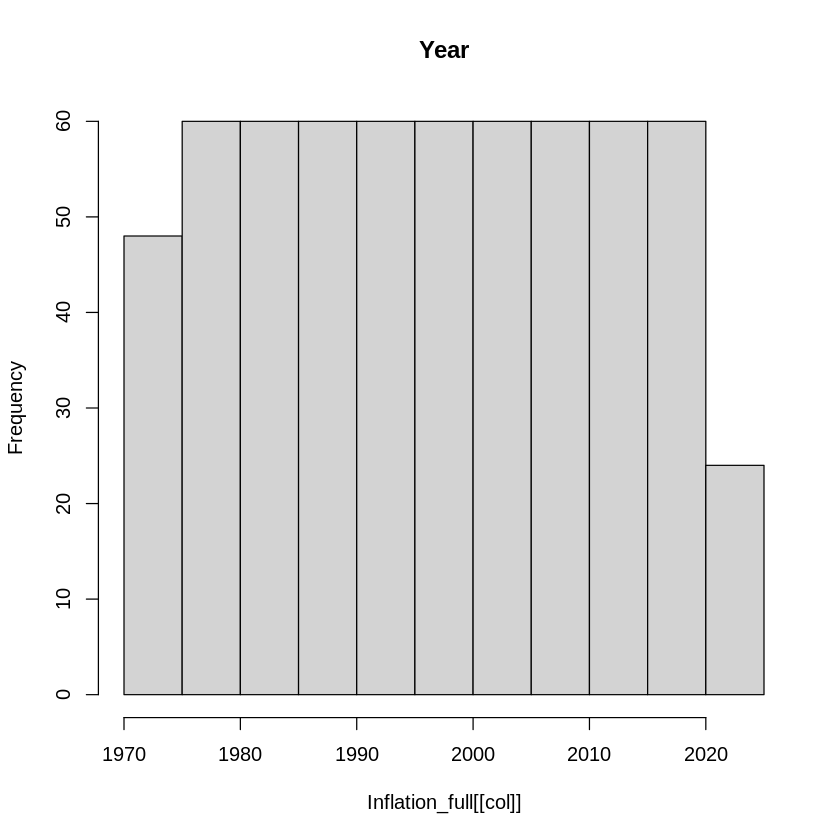

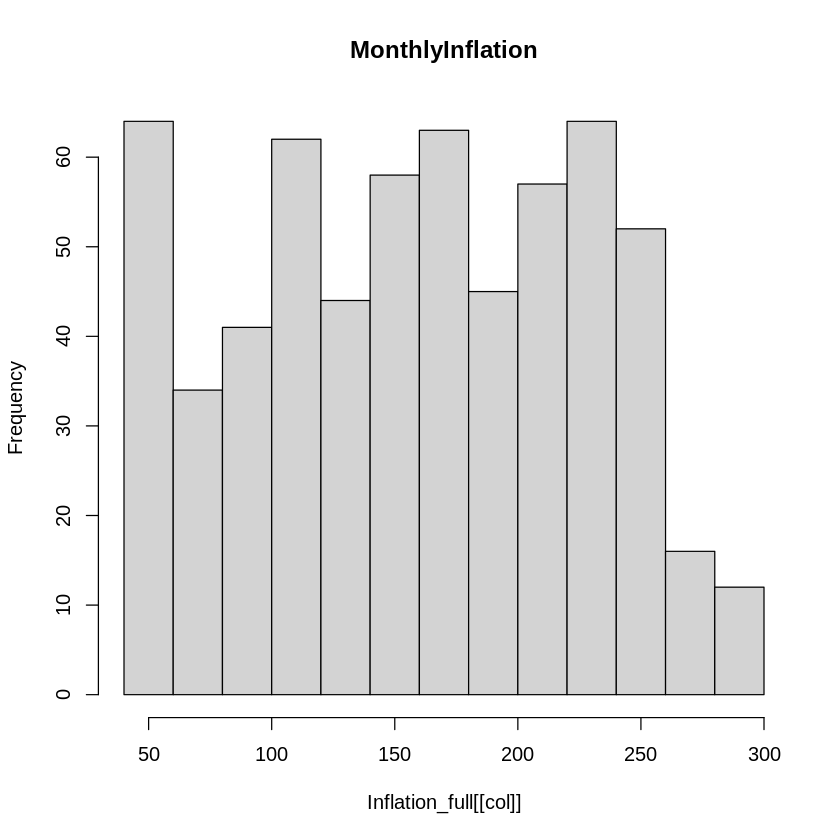

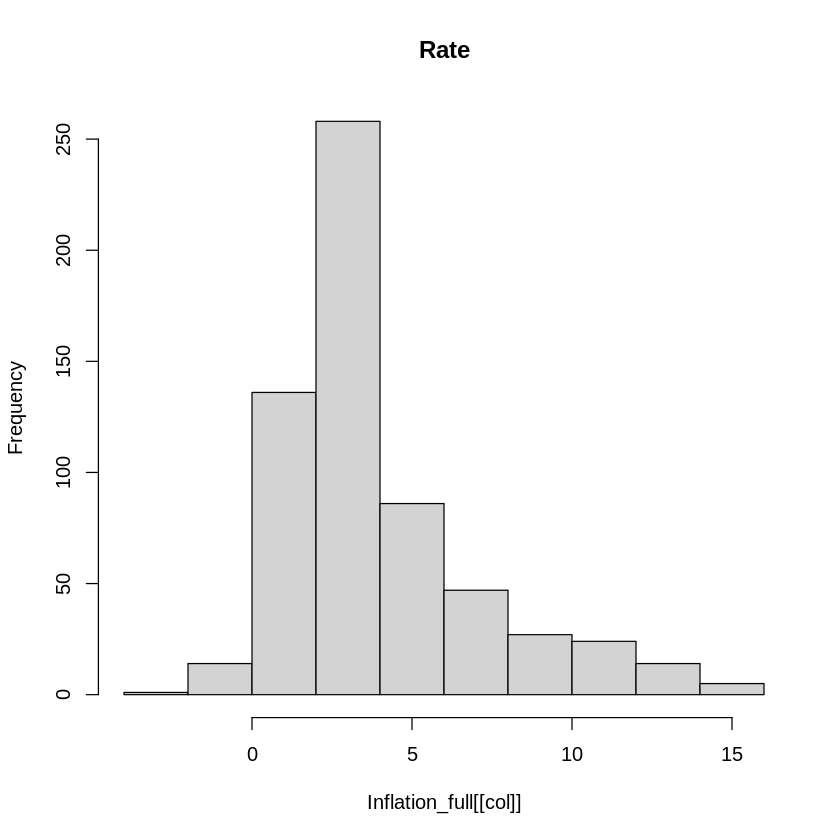

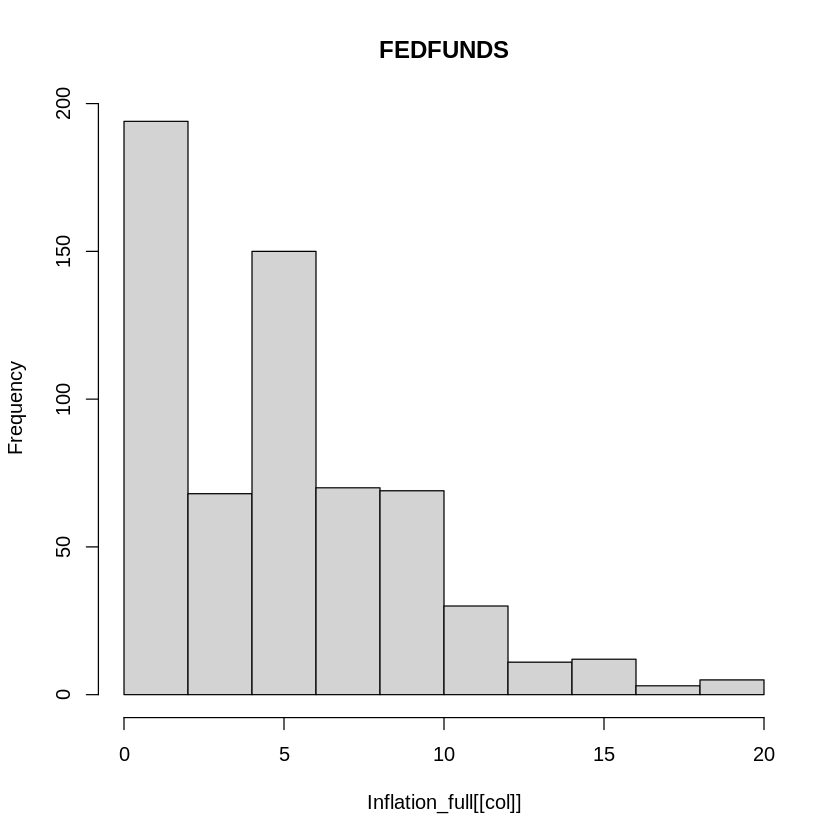

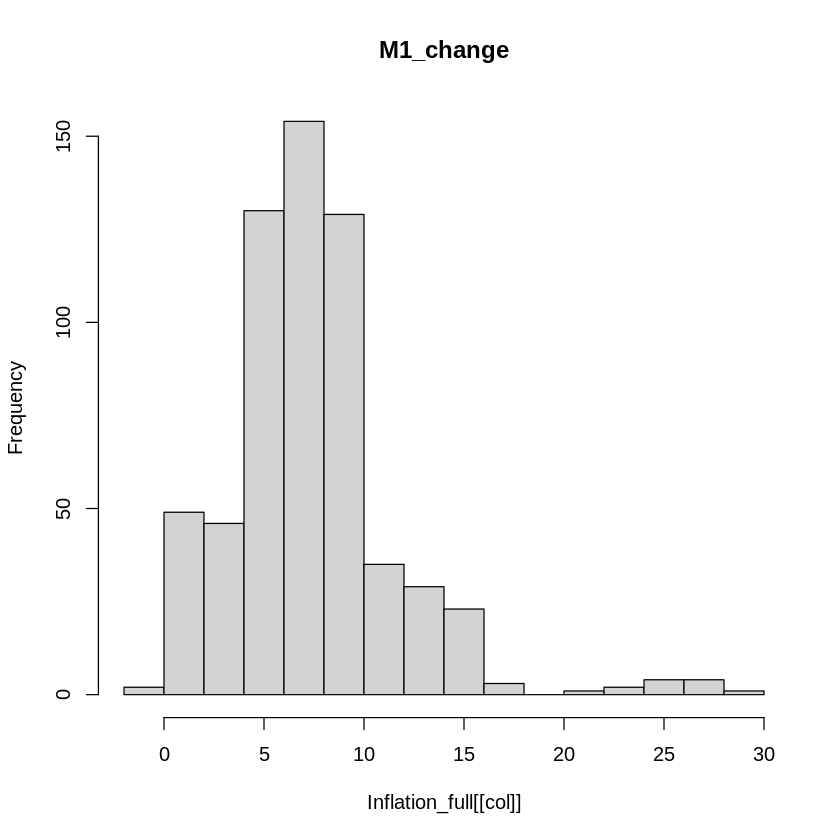

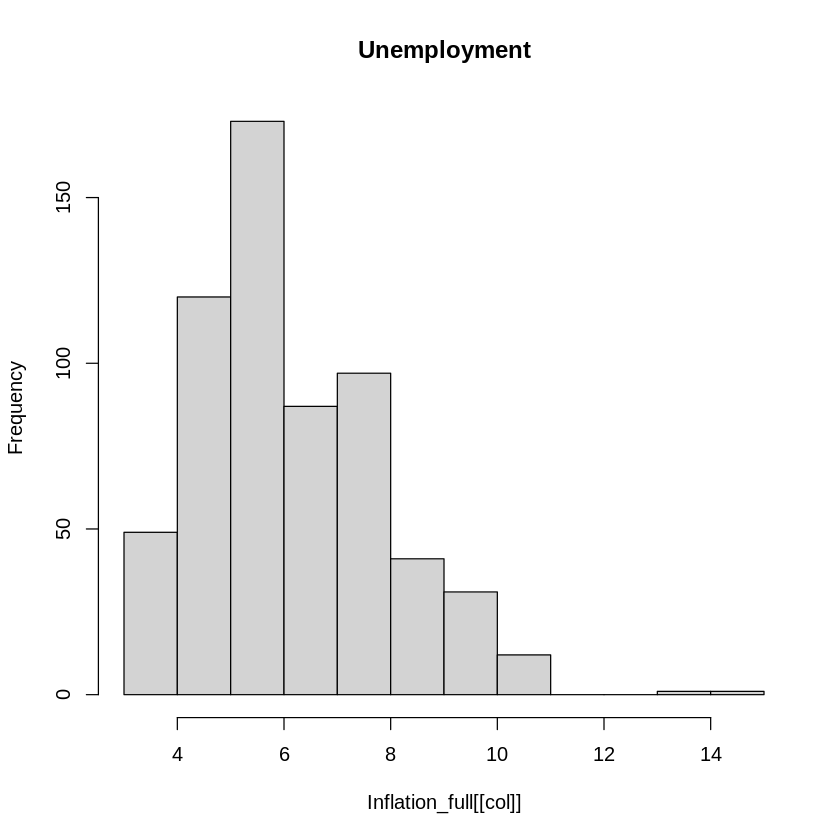

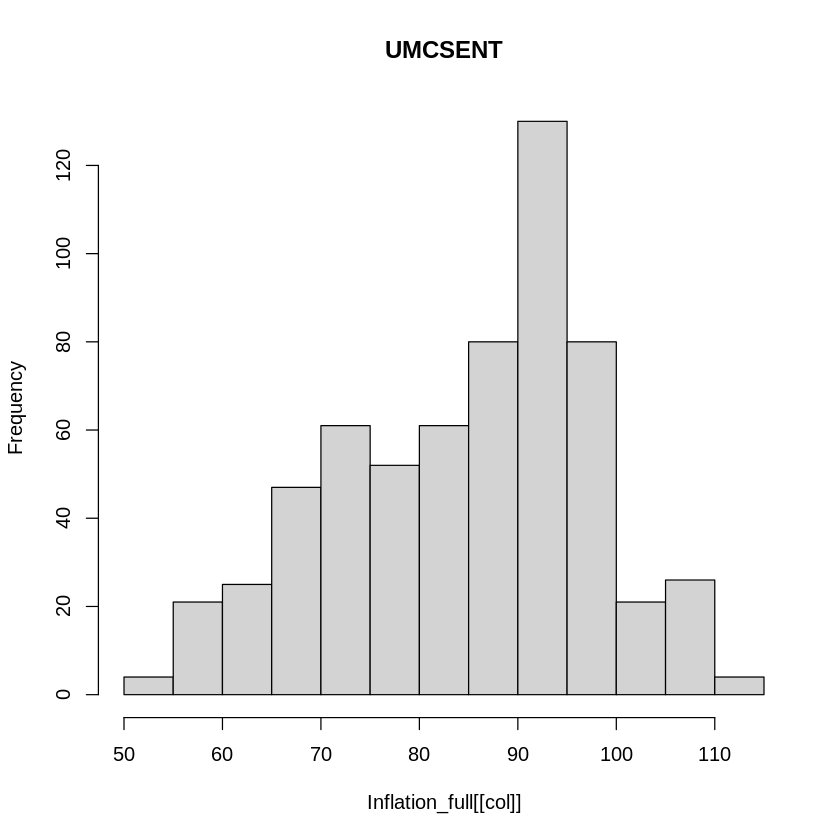

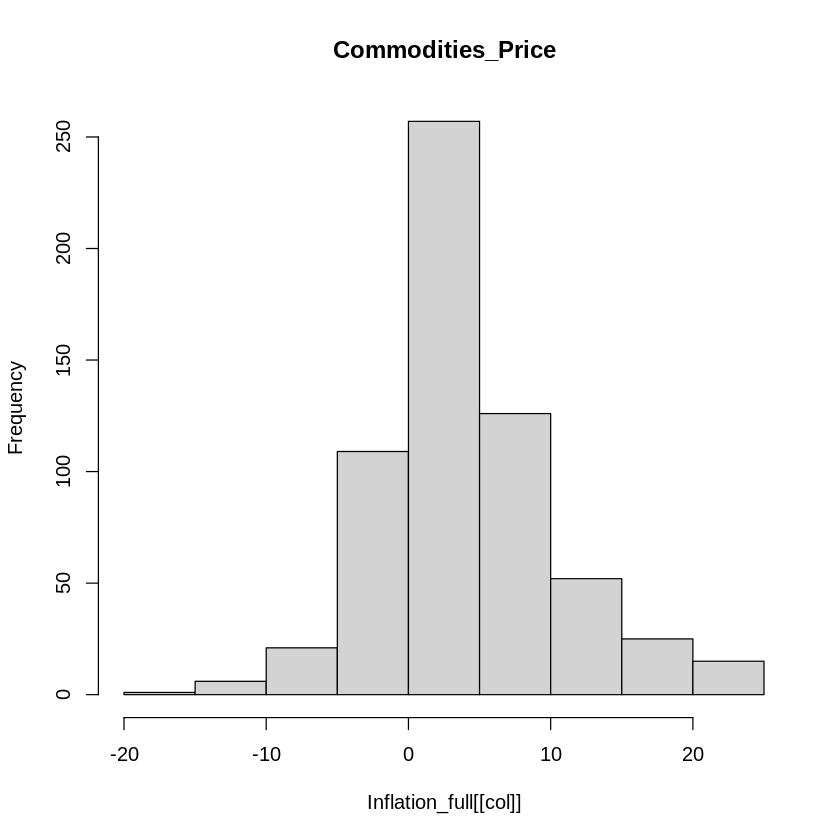

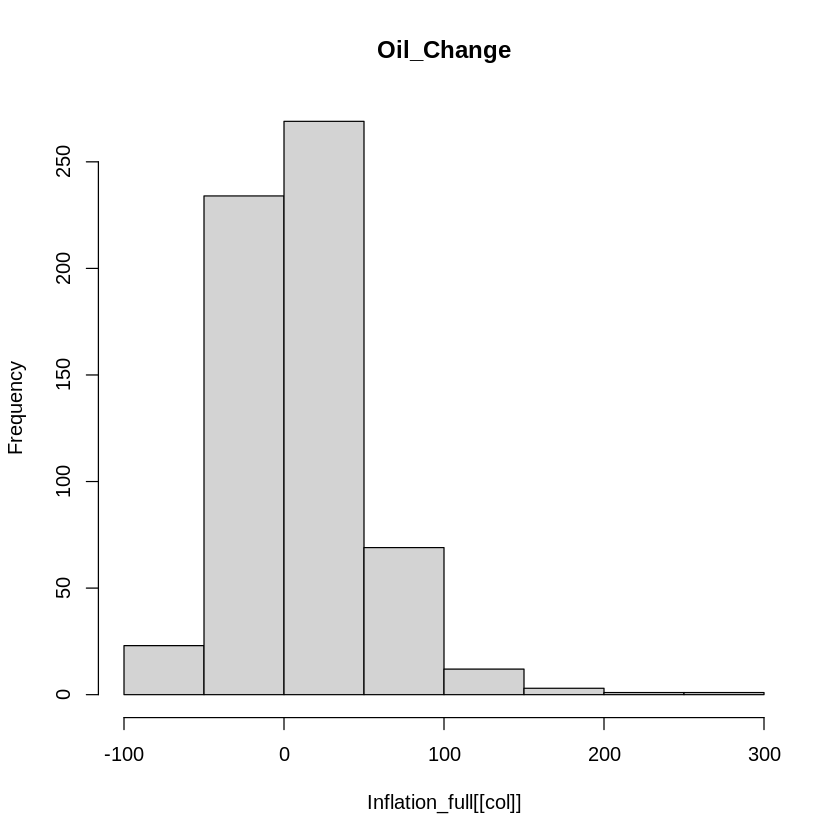

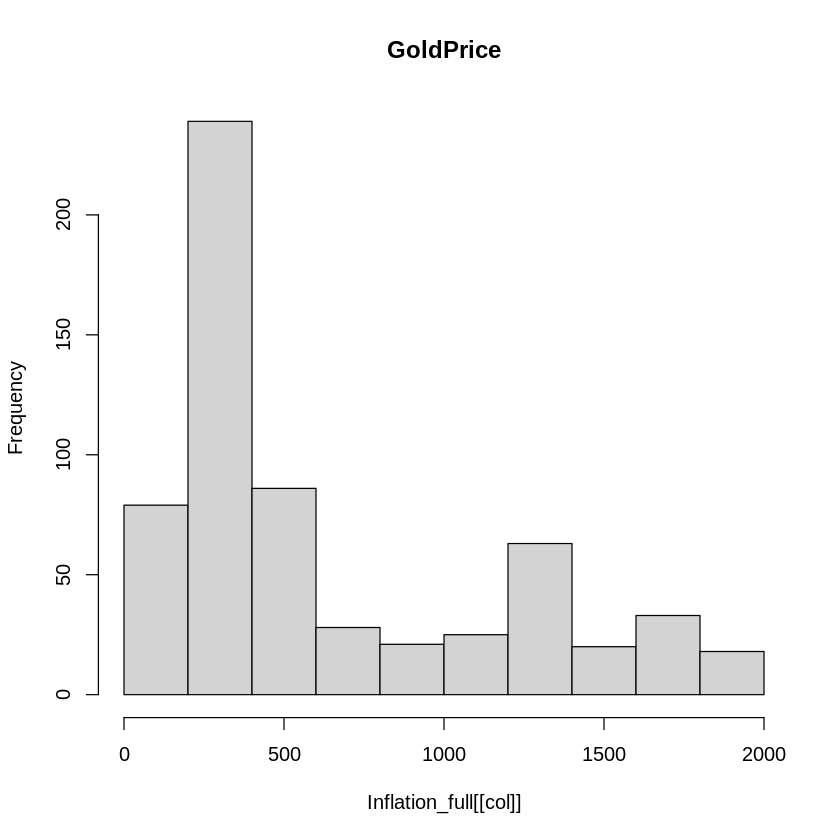

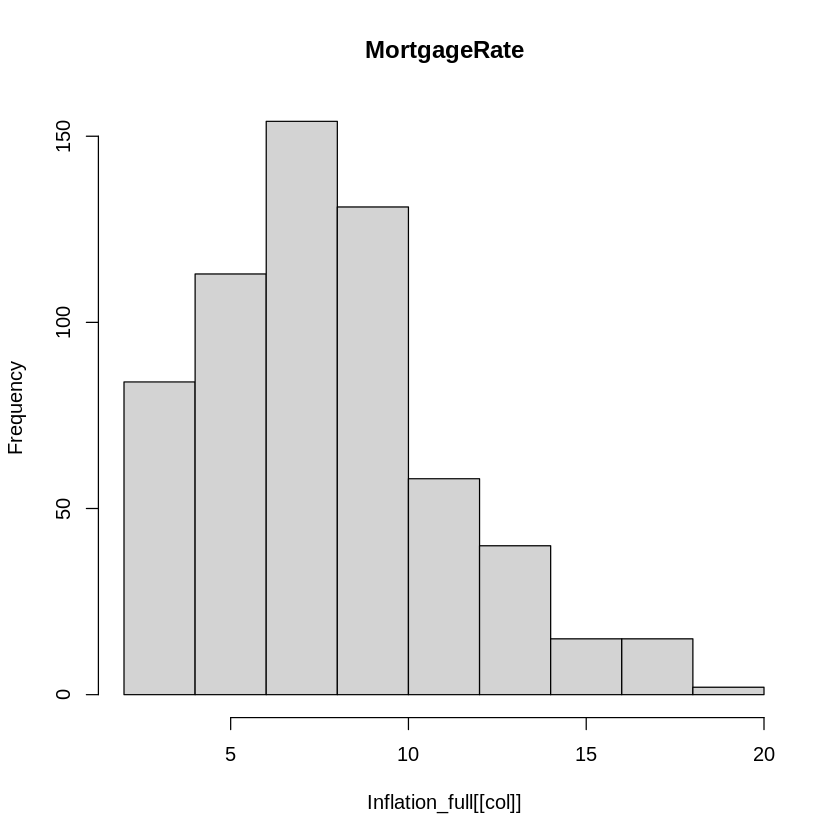

In [87]:
#Loop through columns and create histograms for numeric columns
for (col in names(Inflation_full)) {
  if (is.numeric(Inflation_full[[col]])) {
    hist(Inflation_full[[col]], main = col)
  }
}

***Correlation Matrix***

In [89]:
# Generate a correlation matrix for numeric columns in a dataset
corr_matrix <- cor(Inflation_full[, sapply(Inflation_full, is.numeric)])

In [90]:
#display correlation matrix
corr_matrix

,Year,MonthlyInflation,Rate,FEDFUNDS,M1_change,Unemployment,UMCSENT,Commodities_Price,Oil_Change,GoldPrice,MortgageRate
Year,1.00000000,0.99748862,-0.58263578,-0.77388039,-0.135222459,-0.25514814,0.085413885,-0.218842531,0.02472802,0.83392577,-0.79149033
MonthlyInflation,0.99748862,1.00000000,-0.56951254,-0.75666031,-0.158928377,-0.24766700,0.063610918,-0.206574015,0.03250112,0.83537414,-0.76588107
Rate,-0.58263578,-0.56951254,1.00000000,0.69738339,0.156230836,0.05405995,-0.518603473,0.755012042,0.41929071,-0.28866439,0.59281775
FEDFUNDS,-0.77388039,-0.75666031,0.69738339,1.00000000,0.172622481,0.08786582,-0.100831658,0.297495889,0.10465989,-0.61125838,0.92132661
M1_change,-0.13522246,-0.15892838,0.15623084,0.17262248,1.000000000,0.16559405,0.009985868,-0.007362497,-0.06848069,0.03923990,0.10474027
Unemployment,-0.25514814,-0.24766700,0.05405995,0.08786582,0.165594054,1.00000000,-0.447035667,-0.148507993,-0.18791260,0.02302096,0.29033226
UMCSENT,0.08541389,0.06361092,-0.51860347,-0.10083166,0.009985868,-0.44703567,1.000000000,-0.452393774,-0.16176859,-0.23463179,-0.10502866
Commodities_Price,-0.21884253,-0.20657401,0.75501204,0.29749589,-0.007362497,-0.14850799,-0.452393774,1.000000000,0.71238529,-0.01256251,0.15866813
Oil_Change,0.02472802,0.03250112,0.41929071,0.10465989,-0.068480686,-0.18791260,-0.161768589,0.712385286,1.00000000,0.05642473,0.02772251
GoldPrice,0.83392577,0.83537414,-0.28866439,-0.61125838,0.039239896,0.02302096,-0.234631789,-0.012562512,0.05642473,1.00000000,-0.64158031


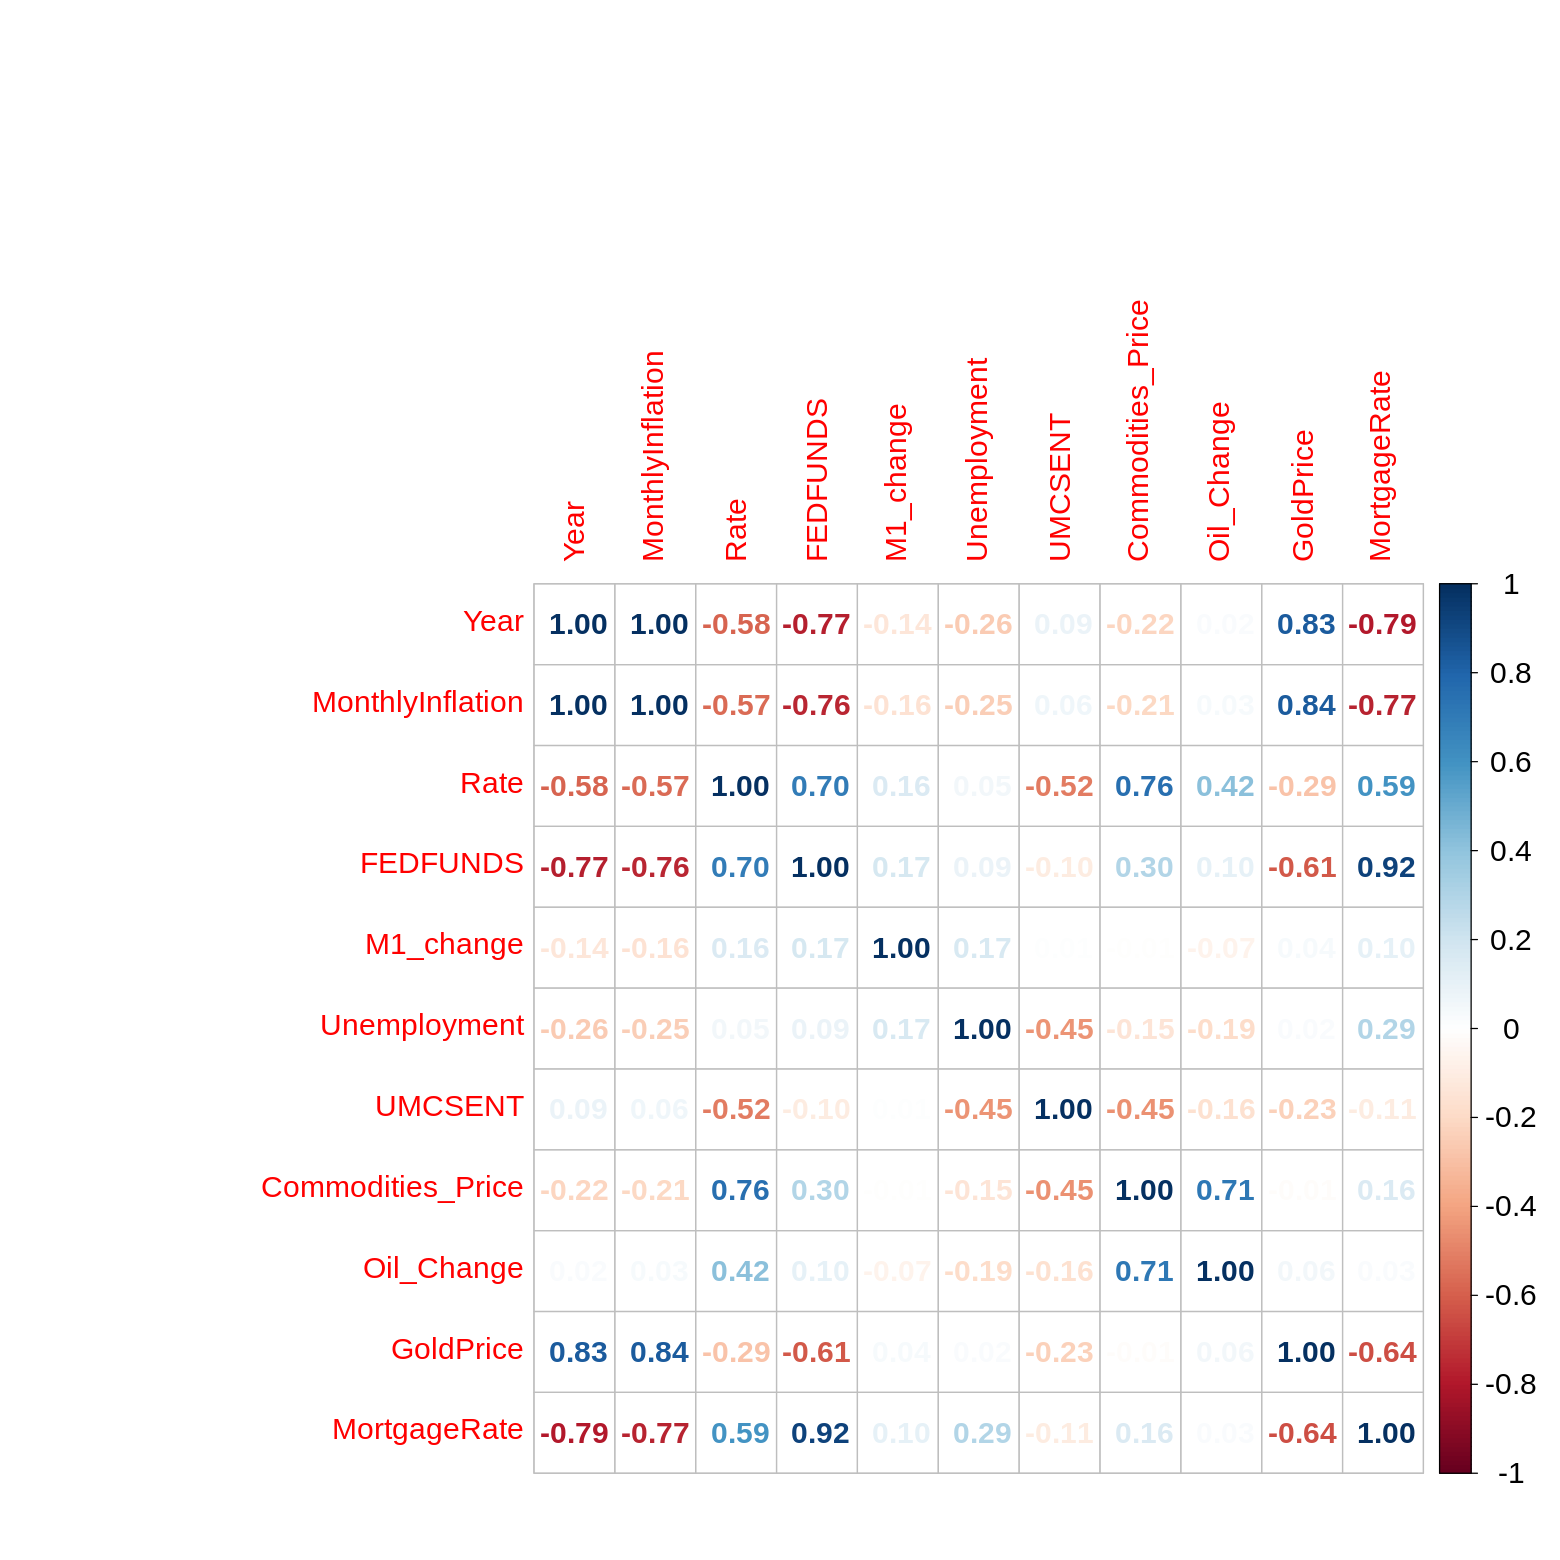

In [91]:
#suppress warnings 
options(warn=-1)

#figure size
fig(13,13)
# Create a corrplot with values
corrplot(corr_matrix, method="number", tl.cex=1.5, cl.cex=1.5, number.cex = 1.5)

***Correlation Plot with color***

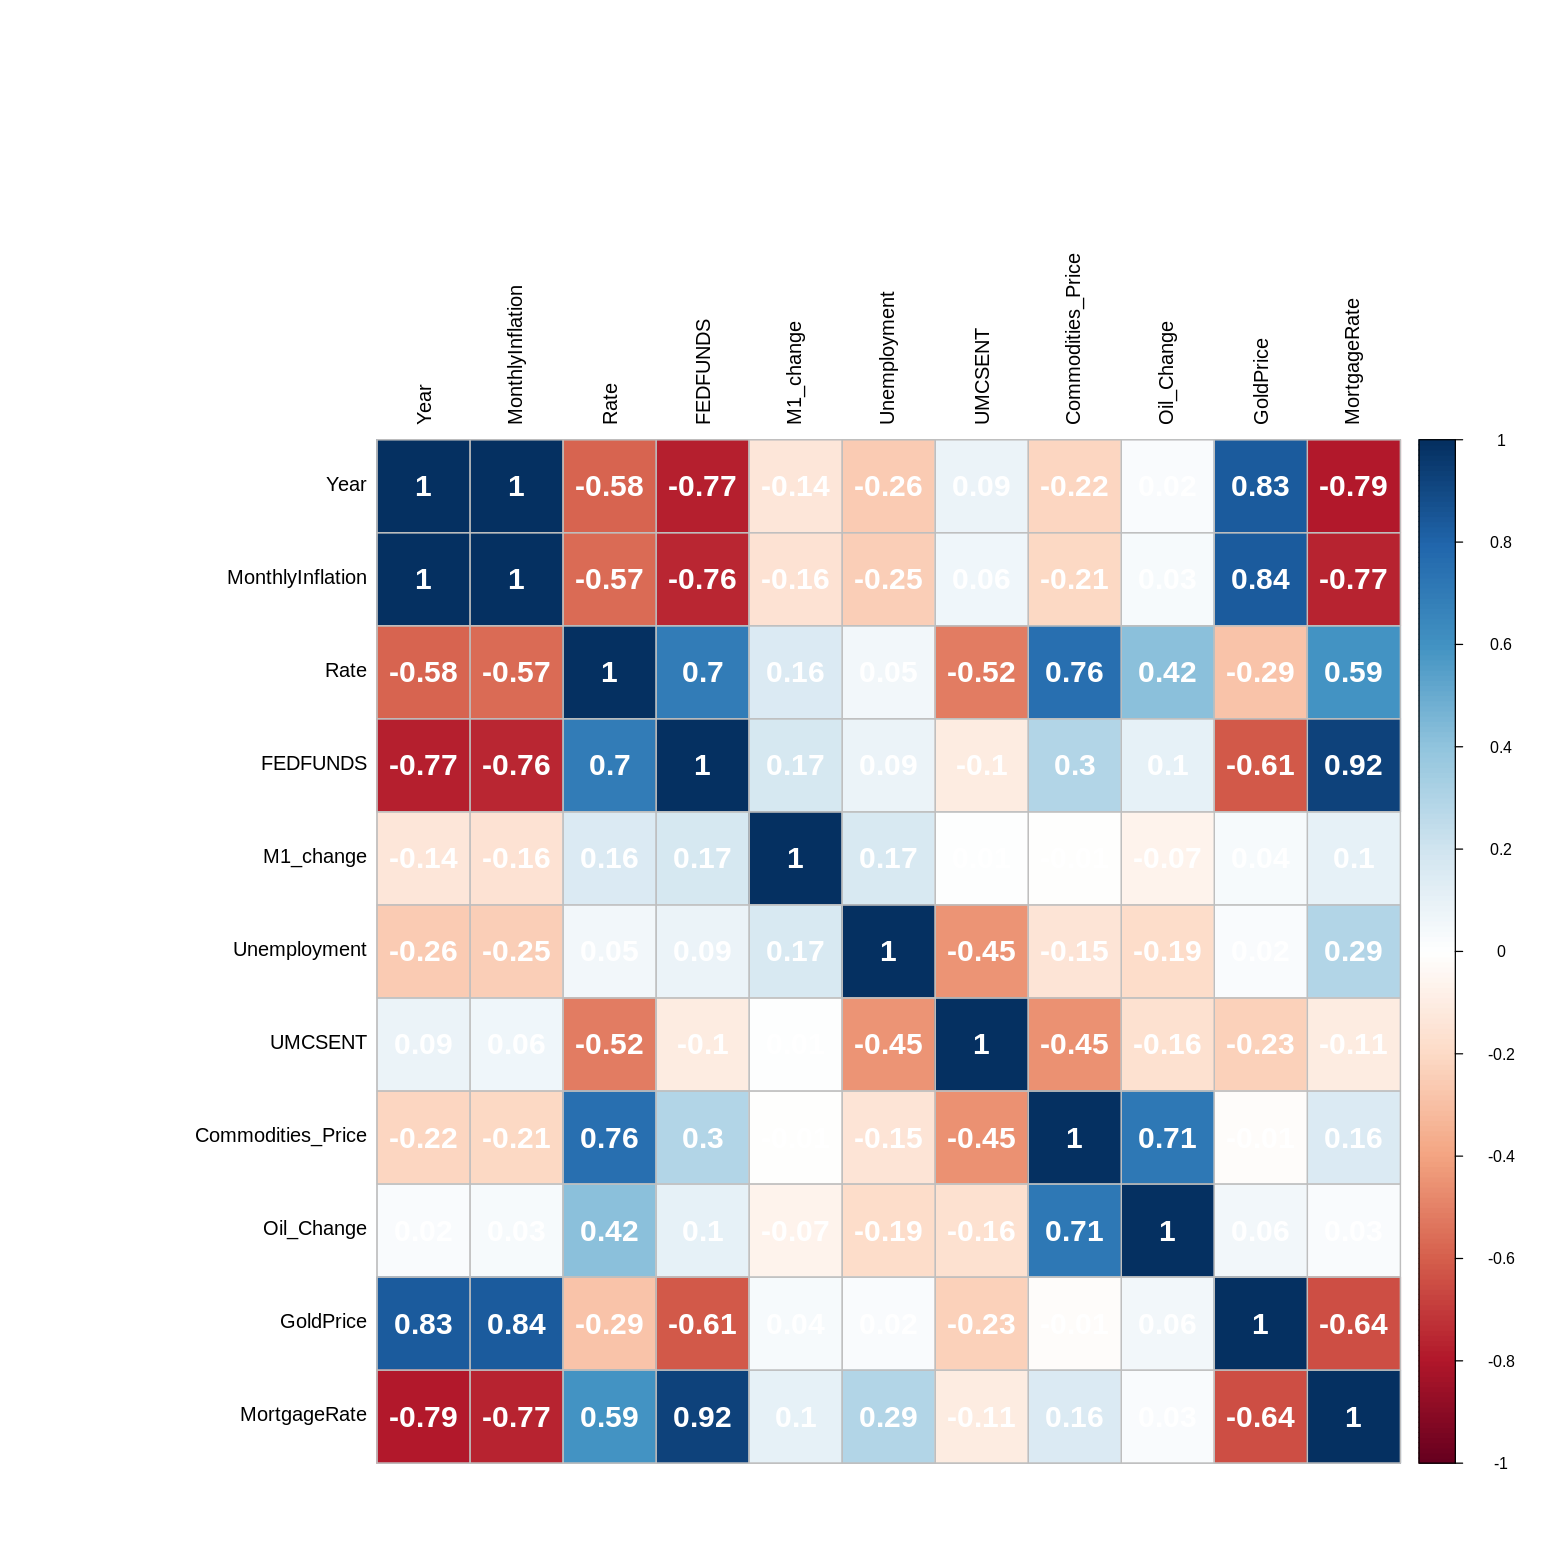

In [92]:
fig(13,13)
corrplot(corr_matrix, method="color", addCoef.col = 'white', tl.col="Black",
         tl.cex=1, addgrid.col = "gray", number.cex=1.5,
         mar=c(0.2, 0.2 ,0.2, 0.2))